Shape: (150, 5)
Columns: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


None

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


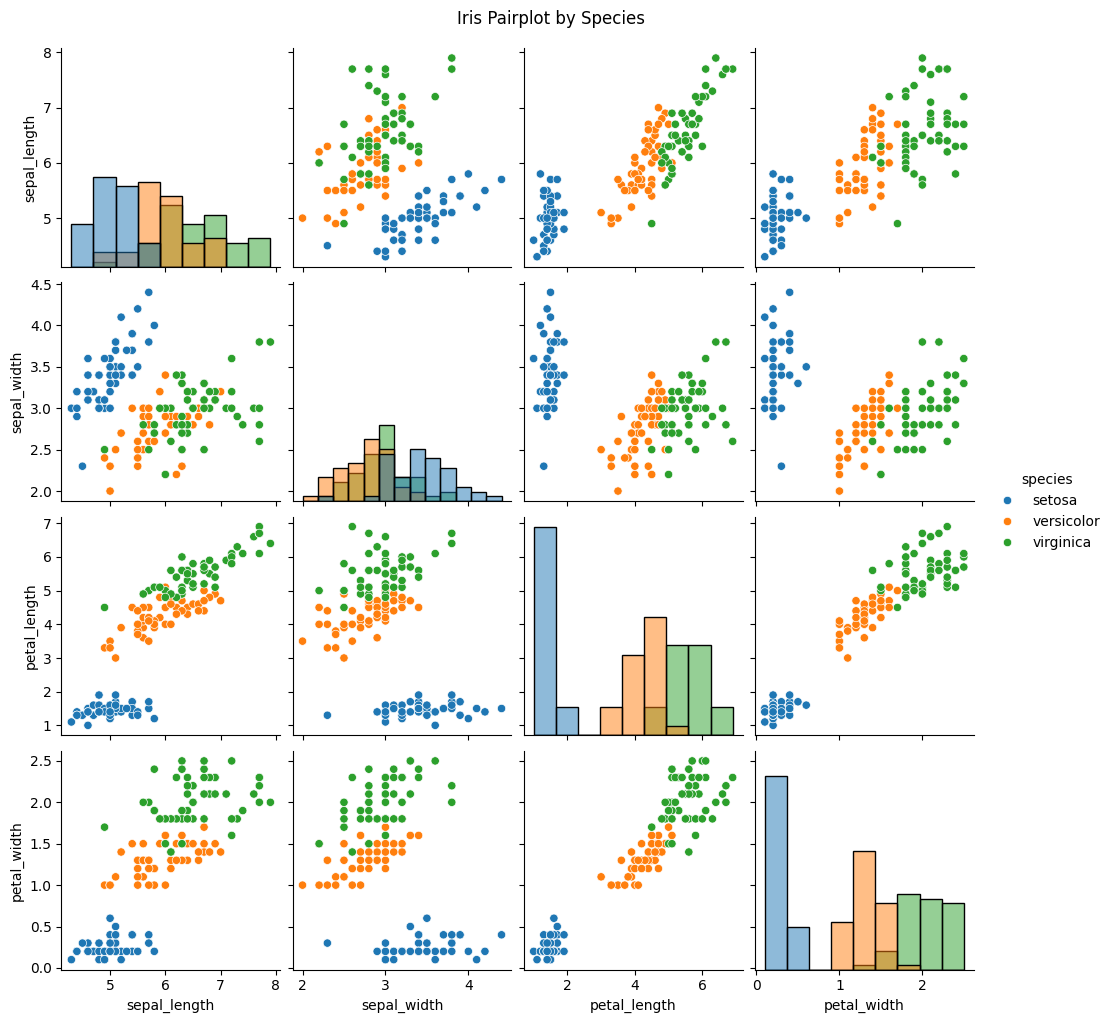

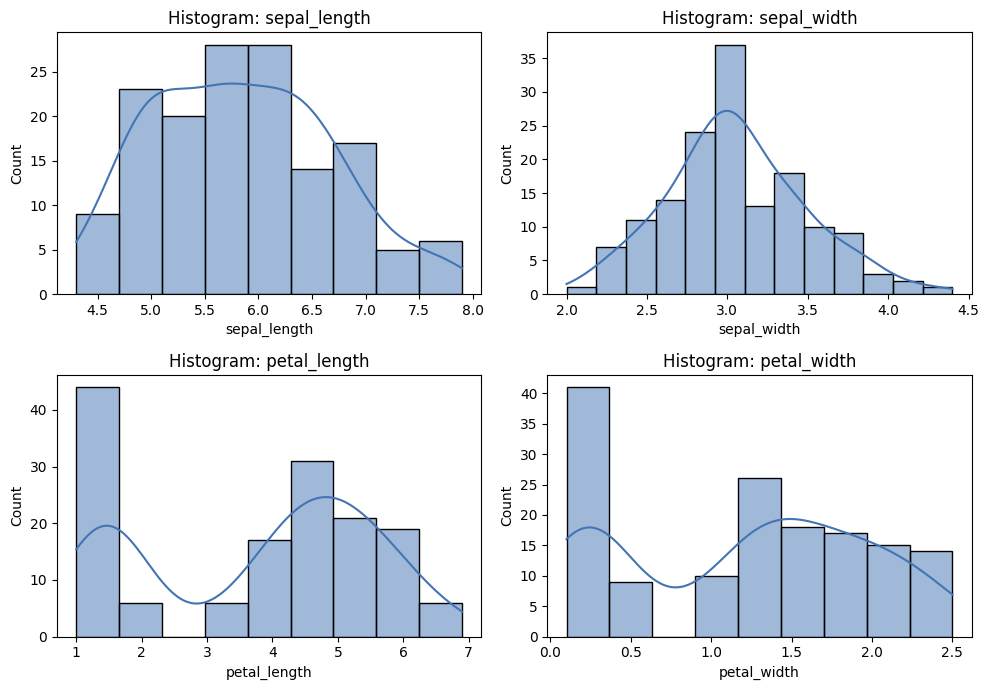

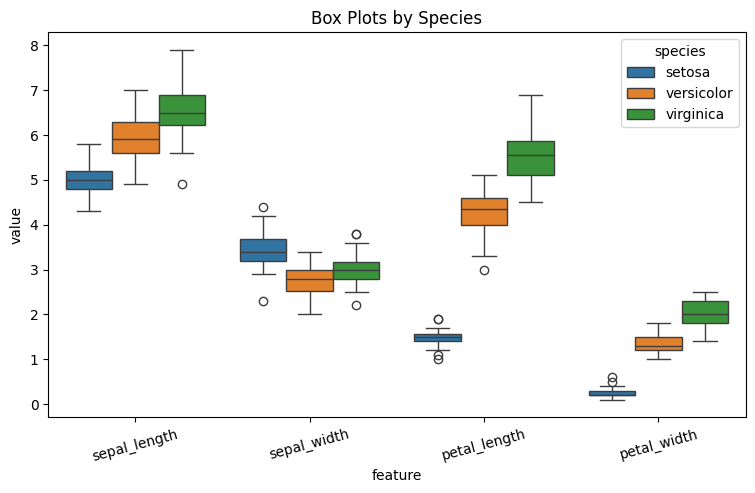

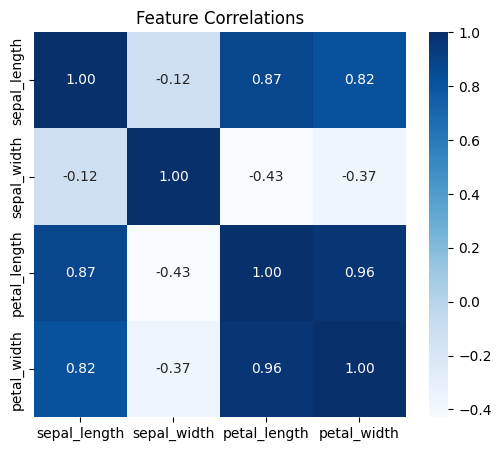

- Petal length/width are strong separators across species.
- Setosa shows distinctively shorter petals.
- Mild outliers may appear on sepal_width for some samples.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df = sns.load_dataset("iris")

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
display(df.head())
display(df.info())
display(df.describe().T)

sns.pairplot(df, hue="species", diag_kind="hist")
plt.suptitle("Iris Pairplot by Species", y=1.02)
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(10, 7))
numeric = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
for ax, col in zip(axes.ravel(), numeric):
    sns.histplot(df[col], kde=True, ax=ax, color="#4374B3")
    ax.set_title(f"Histogram: {col}")
plt.tight_layout()
plt.show()

plt.figure(figsize=(9, 5))
df_melt = df.melt(id_vars="species", value_vars=numeric, var_name="feature", value_name="value")
sns.boxplot(data=df_melt, x="feature", y="value", hue="species")
plt.title("Box Plots by Species")
plt.xticks(rotation=15)
plt.show()

plt.figure(figsize=(6, 5))
sns.heatmap(df[numeric].corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Feature Correlations")
plt.show()

print("- Petal length/width are strong separators across species.")
print("- Setosa shows distinctively shorter petals.")
print("- Mild outliers may appear on sepal_width for some samples.")